# Increasing a number of hidden layers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import to_categorical
np.random.seed(1671)

/Users/tari/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
RESHAPED = 784

In [5]:
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
X_train /= 255
X_test /= 255

In [7]:
print(X_train.shape[0], ' training samples')
print(X_test.shape[0], ' testing samples')

60000  training samples
10000  testing samples


In [8]:
y_train = to_categorical(y_train, NB_CLASSES)
y_test = to_categorical(y_test, NB_CLASSES)

In [9]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape = (RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE,
                    epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 55us/step - loss: 1.4829 - acc: 0.6231 - val_loss: 0.7584 - val_acc: 0.8286
Epoch 2/20
48000/48000 [==============================] - 2s 52us/step - loss: 0.6049 - acc: 0.8463 - val_loss: 0.4550 - val_acc: 0.8852
Epoch 3/20
48000/48000 [==============================] - 2s 51us/step - loss: 0.4398 - acc: 0.8801 - val_loss: 0.3710 - val_acc: 0.9020
Epoch 4/20
48000/48000 [==============================] - 2s 51us/step - loss: 0.3767 - acc: 0.8952 - val_loss: 0.3322 - val_acc: 0.9081
Epoch 5/20
48000/48000 [==============================] - 3s 52us/step - loss: 0.3415 - acc: 0.9025 - val_loss: 0.3055 - val_acc: 0.9147
Epoch 6/20
48000/48000 [==============================] - 2s 51us/step - loss: 0.3175 - acc: 0.9086 - val_loss: 0.2880 - val_acc: 0.9182
Epoch 7/20
48000/48000 [==============================] - 2s 52us/step - loss: 0.2989 - acc: 0.9137 - val_loss: 0.2727 - val_acc

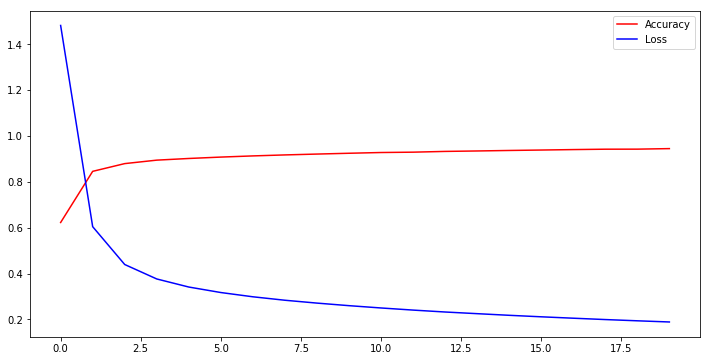

In [11]:
plt.figure(figsize=(12,6))
plt.plot(history.history['acc'], color = 'red', label = 'Accuracy' )
plt.plot(history.history['loss'], color = 'blue', label = 'Loss')
plt.legend()

In [12]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print('Test score {}'.format(score[0]))
print('Test accuracy {}'.format(score[1]))

10000/10000 [==============================] - 1s 64us/step
Test score 0.18601375955343247
Test accuracy 0.9462


# Visualization

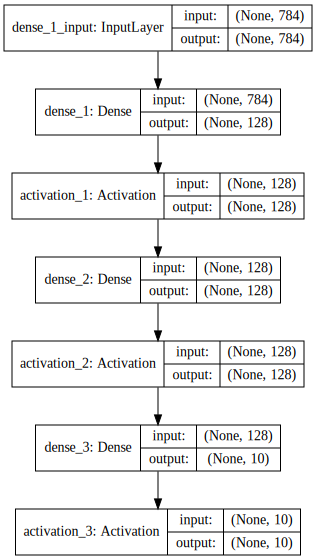

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

# Homework 
1. Remove one hidden layer
2. Add one more hidden layer

In [14]:
#Your code here